# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV 

# Load and Review data

In [2]:
House_data = pd.read_csv("kc_house_data.csv",engine='python')

In [3]:
House_data.shape

(21613, 21)

In [4]:
House_data.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
House_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [7]:
House_data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [8]:
House_data.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [9]:
House_data.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [10]:
House_data.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [11]:
House_data.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [12]:
House_data.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

# Observations

1. The maximum number of bedrooms in a house are 33. So might wanted to look at that record and check if it is an outlier.
2. one floor houses are the most common type of houses sold 
3. Very few houses have view to a waterfront and these houses might be costly
4. House condition is rated from 1 to 5 and the most common rating is 3
5. House grade is rated from 1 to 13 and the most common rating is 7

# Converting day hours to date time object

In [13]:
House_data['date'] = pd.to_datetime(House_data['date']).dt.to_period('m')

House_data.head()

id     date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  2014-10  221900.0         3       1.00         1180      5650   
1  6414100192  2014-12  538000.0         3       2.25         2570      7242   
2  5631500400  2015-02  180000.0         2       1.00          770     10000   
3  2487200875  2014-12  604000.0         4       3.00         1960      5000   
4  1954400510  2015-02  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

# To checlk if there are any null values or missing data

In [14]:
House_data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There are no null values or missing values in the data. No data cleansing is required.

# To check if there are duplicate entries

In [15]:
House_data.duplicated().sum()

0

# Univariate analysis

# Plotted the box plot of different columns to check if there are any outliers

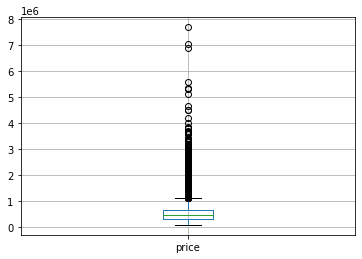

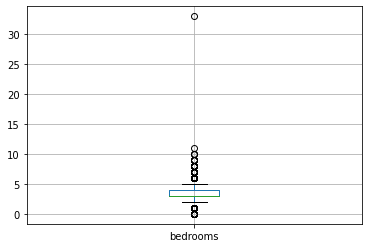

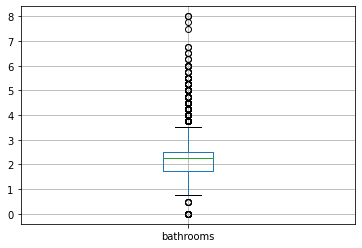

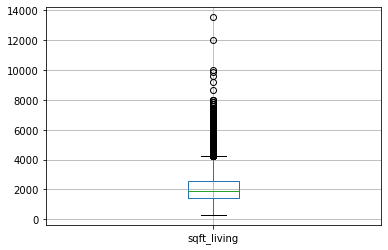

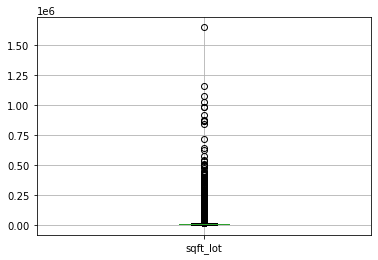

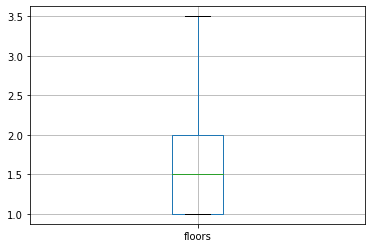

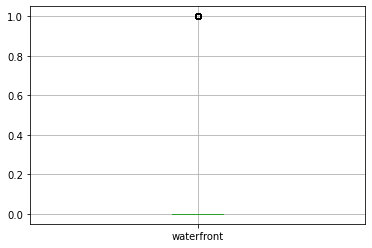

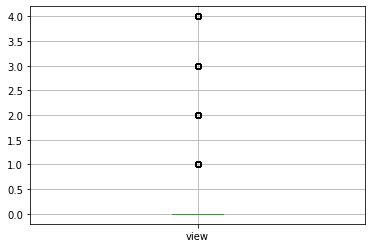

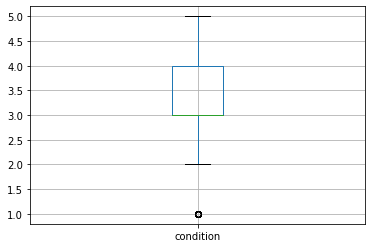

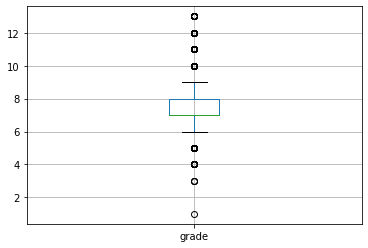

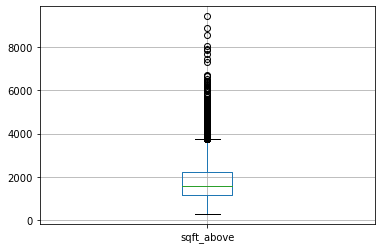

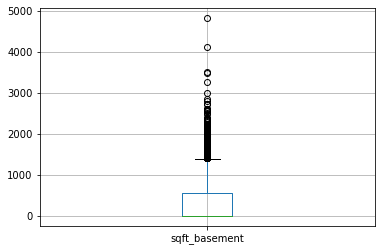

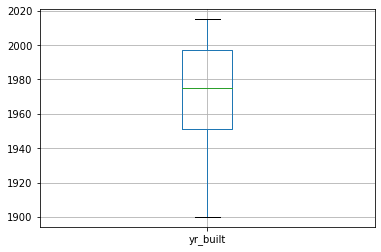

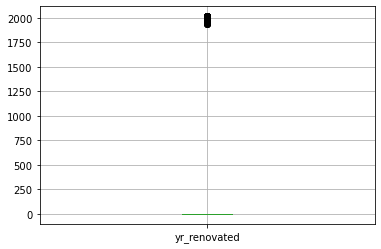

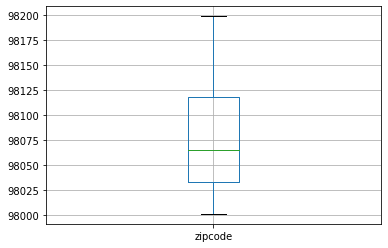

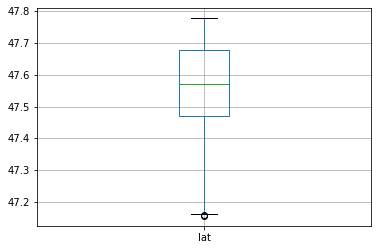

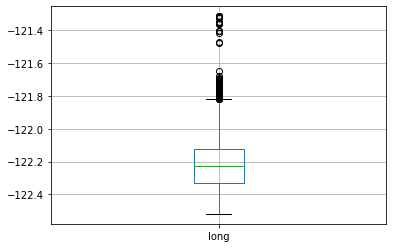

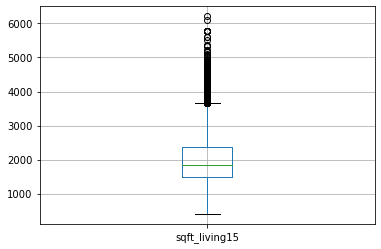

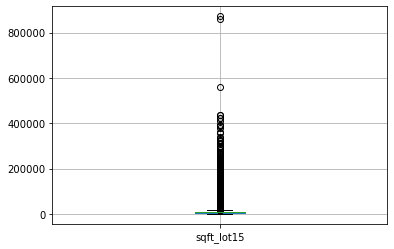

In [16]:
for i in House_data.iloc[:, 2:].columns:
    House_data.iloc[:, 1:].boxplot(column=i)
    plt.show()

# To see the # of houses sold based on number of bedrooms

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

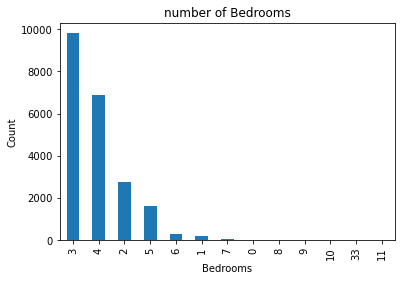

In [17]:
House_data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

The most common type of house sold are the ones with three bedrooms. So this is helpful as we can understand 3 bedroom houses have more demand followed by 4 bedroom. So # of bedrooms might be an important factor while we fix the price.

# To check if location (lattitude and longitude have an impact on # of houses sold

<Figure size 720x720 with 0 Axes>

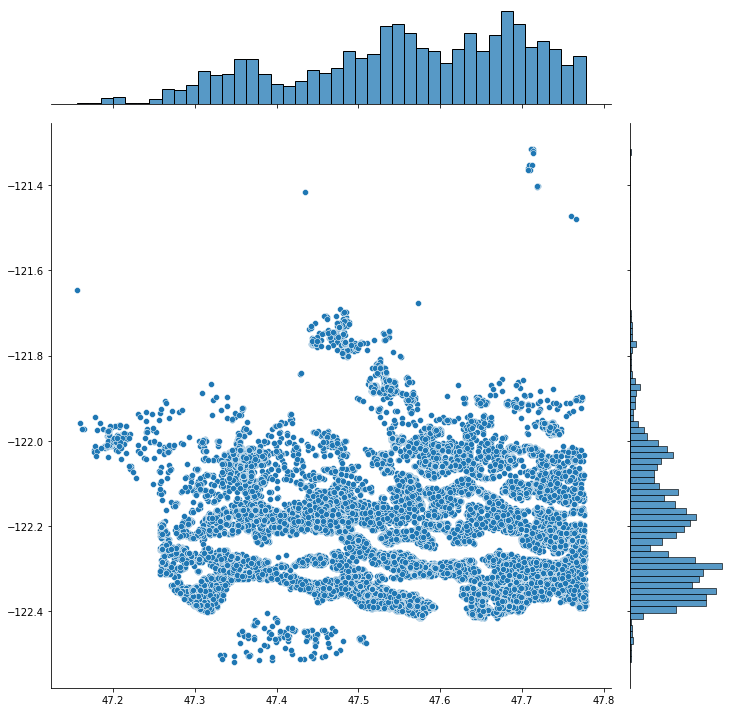

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [18]:
plt.figure(figsize=(10,10))
sns.jointplot(x=House_data.lat.values, y=House_data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

# Observation

we see large number of houses between latitudes 47.5 and 47.8 and in terms of longitude there are large number of houses between -122.2 and -122.4. This location might be the ideal location for people to live and house prices might vary based up on this lattitude and longitude

# Bivariate anlaysis

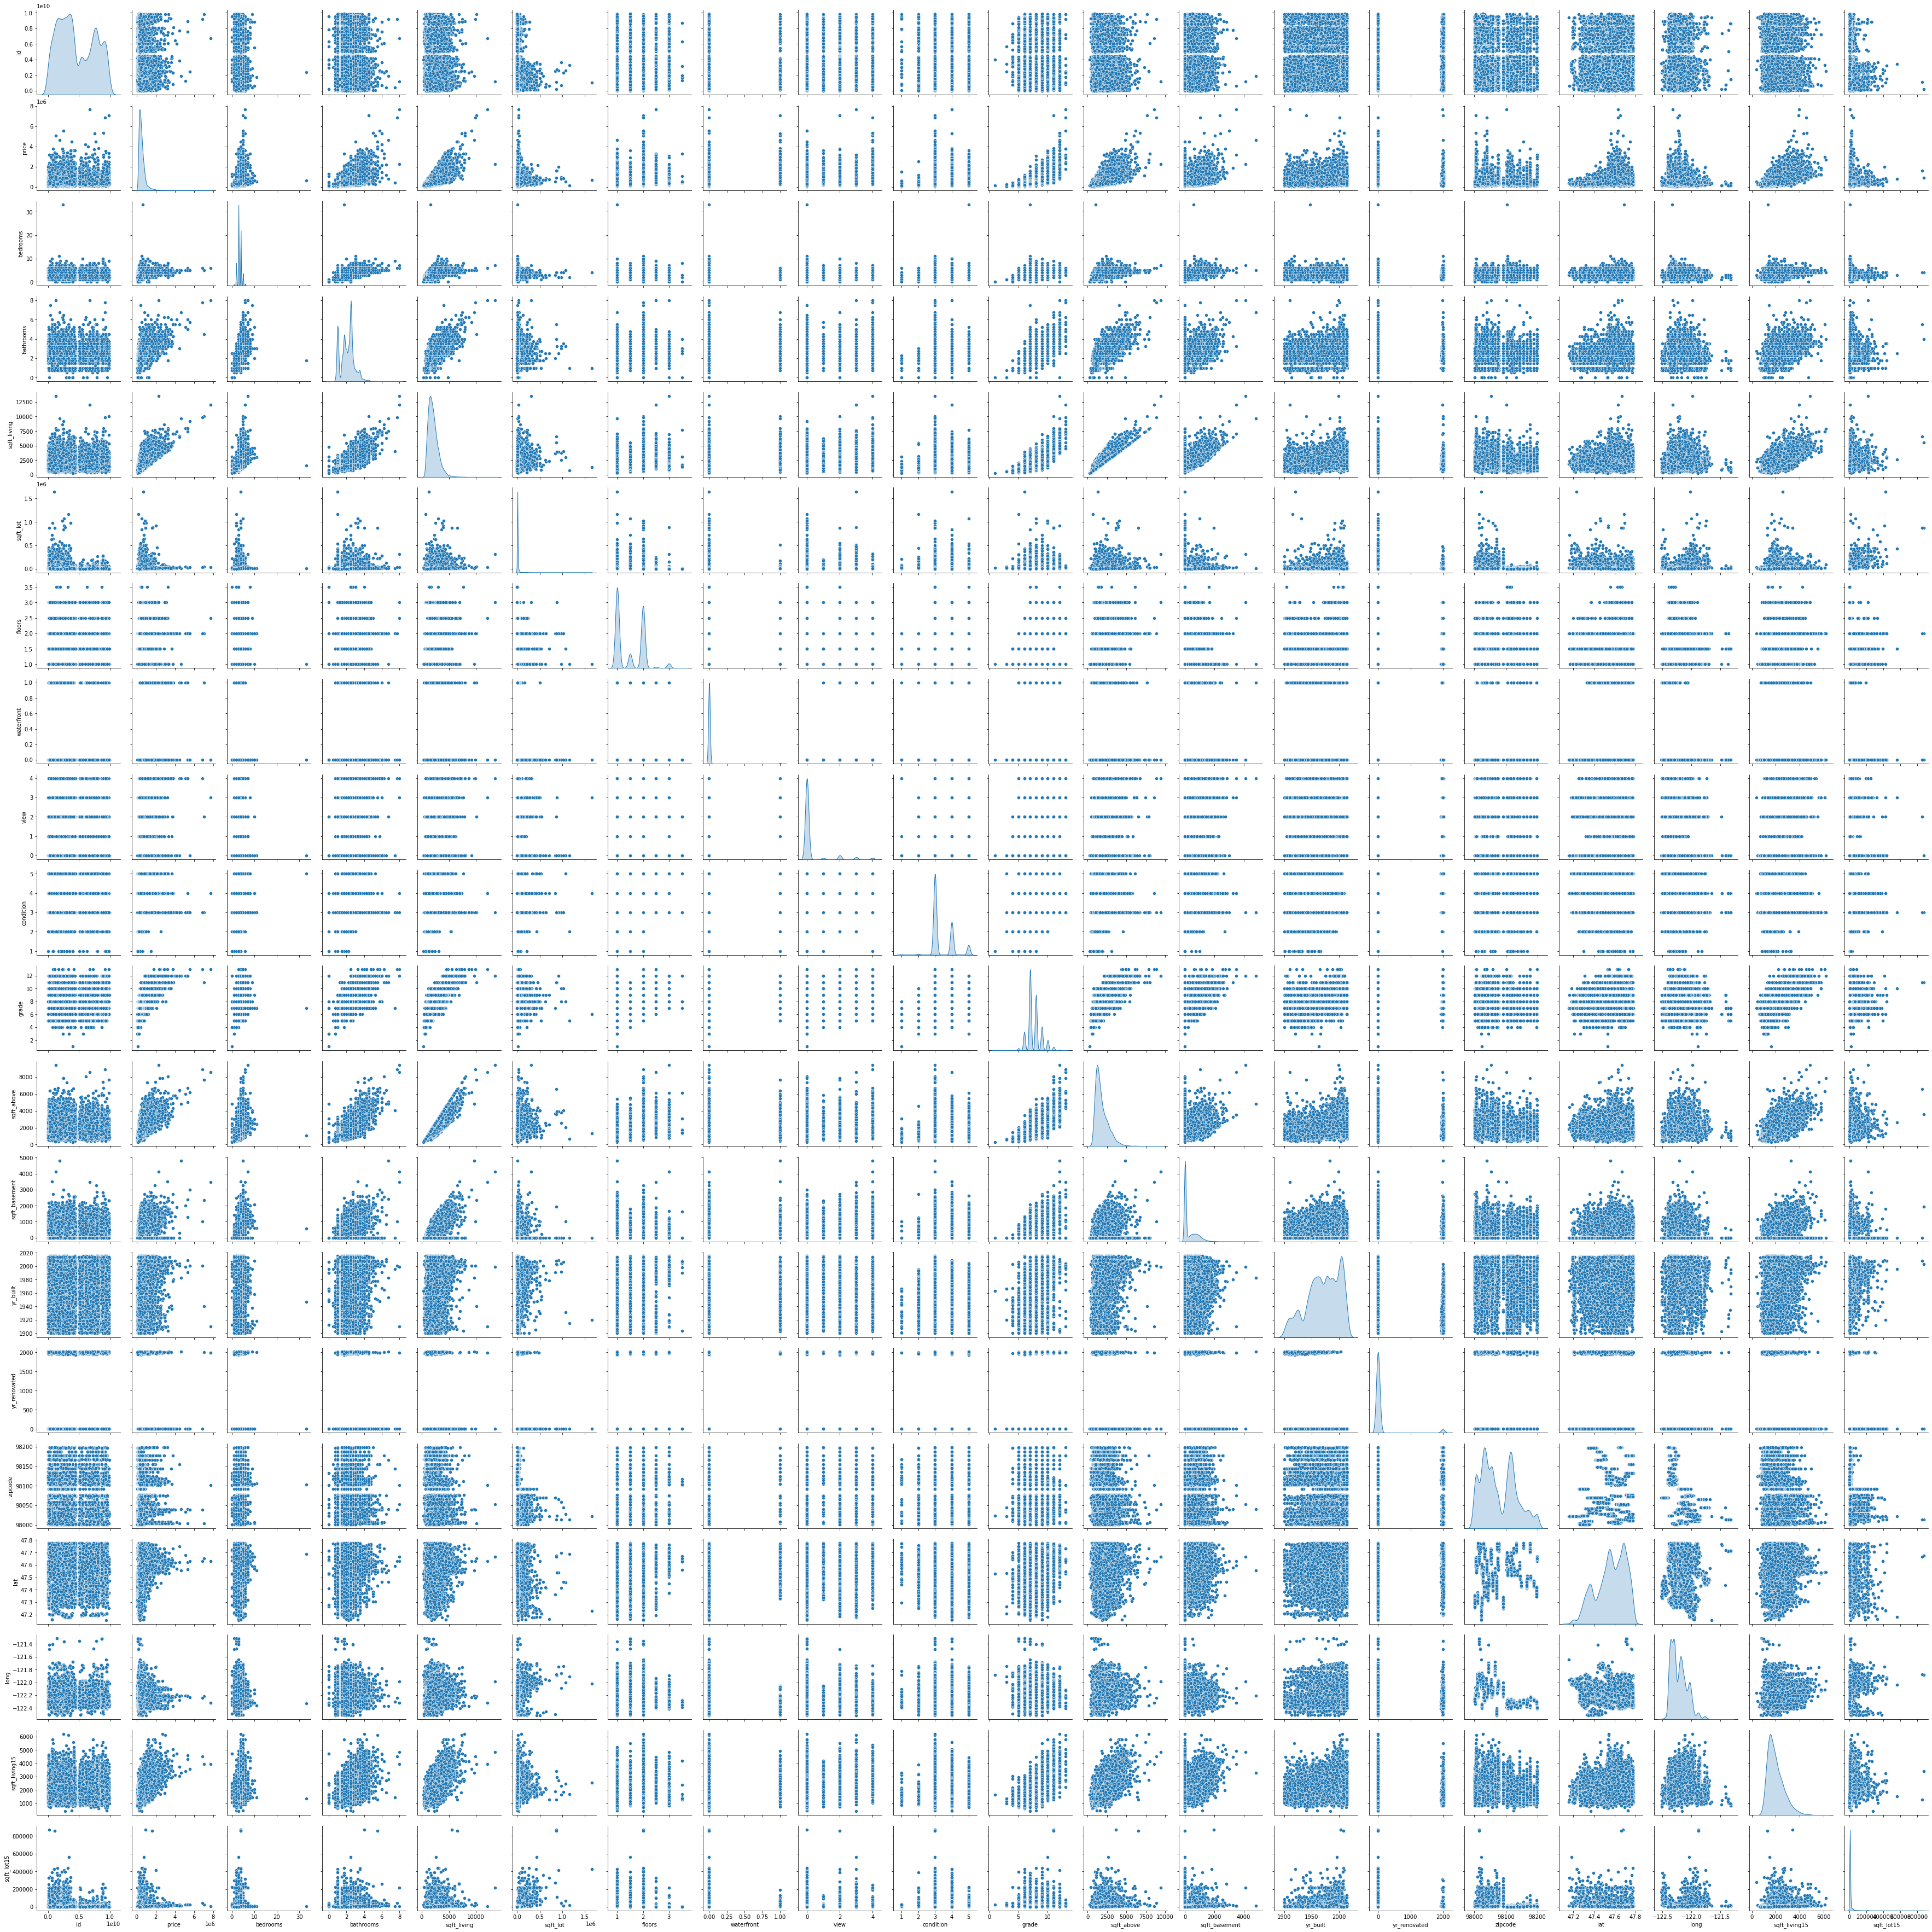

In [19]:
HData_attr = House_data.iloc[:, 0:21]
sns.pairplot(HData_attr, diag_kind='kde') 

In [20]:
house_corr = House_data.corr(method ='pearson')
house_corr

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

# Observations from bivariate analysis

1. sqft_living, bathrooms, grade, sqft_above, sqft_living15 are the metrics which have high correlation to the target variable price. So these metrics might pop up as important metrics from the regression execrise
2. Also few of the above highlighgted variables are also correlated with each other because of which only few of them might have significant impact on price because of multi-collinearity  

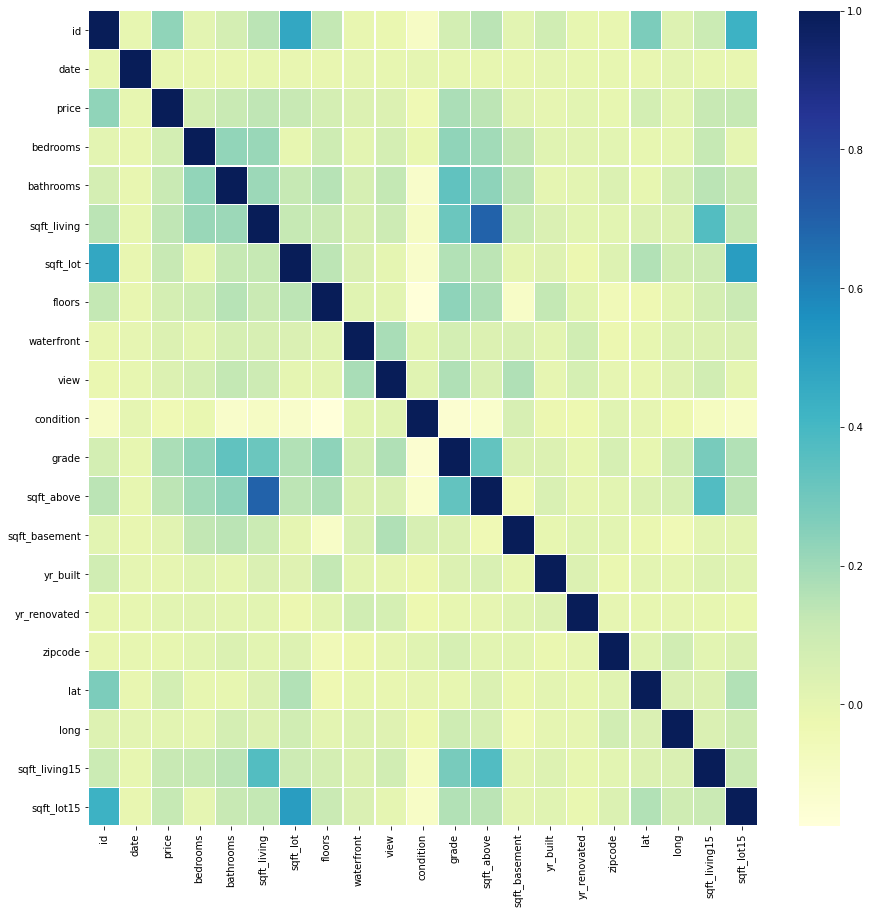

In [21]:
plt.figure(figsize=(15,15))
corr = House_data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

# Data pre processing 

In [22]:
House_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Defining the independent and dependent variables

In [23]:
X = House_data.drop(['price','id','date', 'zipcode', 'yr_renovated'],axis=1)
y = House_data[['price']]

# splitting the data into train and test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=110)

# Linear regression

In [25]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [26]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for bedrooms is -34957.95534633747
The coefficient for bathrooms is 37791.36613476343
The coefficient for sqft_living is 112.90954558776684
The coefficient for sqft_lot is 0.1228474578820169
The coefficient for floors is 1910.425682818595
The coefficient for waterfront is 647494.3755909973
The coefficient for view is 48754.019390010995
The coefficient for condition is 28708.66374705625
The coefficient for grade is 97127.37038629384
The coefficient for sqft_above is 74.00698944407668
The coefficient for sqft_basement is 38.90255639054658
The coefficient for yr_built is -2495.663406650572
The coefficient for lat is 563607.1948990244
The coefficient for long is -118441.28306920663
The coefficient for sqft_living15 is 24.908513273189783
The coefficient for sqft_lot15 is -0.3753527471999405


In [27]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -37067704.28227505


# Ridge regression

In [28]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-3.49730319e+04  3.77953074e+04  1.12921043e+02  1.22534273e-01
   1.94211797e+03  6.45482163e+05  4.88422512e+04  2.86944418e+04
   9.71419185e+04  7.40018922e+01  3.89184110e+01 -2.49690495e+03
   5.62948887e+05 -1.18307328e+05  2.48925106e+01 -3.75413385e-01]]


# Lasso regression

In [29]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-3.49578955e+04  3.77910485e+04  2.90142235e+02  1.22843149e-01
  1.91045171e+03  6.47479476e+05  4.87546325e+04  2.87082000e+04
  9.71275873e+04 -1.03225562e+02 -1.38329549e+02 -2.49568035e+03
  5.63601762e+05 -1.18434667e+05  2.49080651e+01 -3.75357208e-01]


/Users/ushakiranbellam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291212618760608.7, tolerance: 208396132543.8401
  model = cd_fast.enet_coordinate_descent(


In [30]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.6936811522703692
0.6970043201327395


In [31]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.693680910533585
0.6970423707747492


In [32]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6936811522508262
0.6970046055975225


There is no considerable increase in the Rsquare value when Ridge or Lasso regression are used instead of linear regression

# Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [34]:
dtree_up = DecisionTreeRegressor()
dtree_up.fit(X_train, y_train)               # Fitting model with x_train and y_train
dtree_pred_up = dtree_up.predict(X_test)     # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred_up, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, dtree_pred_up))
print("Accuracy :",dtree_up.score(X_test, y_test))

RMSE: 435.59202911294017
r2 score: 0.72
Accuracy : 0.7183341363644169


# Hyperparameter tuned Decision Tree Regression

In [35]:
dtree = DecisionTreeRegressor(random_state=5)
d=np.arange(1,21,1)
hyperParam = [{'max_depth':d}]

gsv = GridSearchCV(dtree,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(X_train, y_train)                          # Fitting model with xtrain_scaler and y_train
dtree_pred_mms = best_model.best_estimator_.predict(X_test)     # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)

print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred_mms, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, dtree_pred_mms))
print("Accuracy :",best_model.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best HyperParameter:  {'max_depth': 10}
RMSE: 423.2095141165393
r2 score: 0.75
Accuracy : 0.7490216788881379


# Random forest Regressor 

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [37]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)             # Fitting model with x_train and y_train
rf_pred = rf.predict(X_test)         # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, rf_pred))
print("Accuracy :",rf.score(X_test, y_test))

<ipython-input-37-fbe1021d6042>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)             # Fitting model with x_train and y_train


RMSE: 354.7300702517989
r2 score: 0.88
Accuracy : 0.876118475941565


# Hyperparameter tuned Random forest Regressor

In [38]:
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]

gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train, y_train)

print("Best HyperParameter: ",gsv.best_params_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(X_train, y_train)        # Fitting model with x_train and y_train

# Predicting the results:
rf_pred_tune = model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred_tune, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, rf_pred_tune))
print("Accuracy :",model.score(X_test, y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/ushakiranbellam/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ushakiranbellam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best HyperParameter:  {'max_depth': 20, 'n_estimators': 220}


<ipython-input-38-54f1e3eaead9>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)        # Fitting model with x_train and y_train


RMSE: 354.14880652940246
r2 score: 0.88
Accuracy : 0.876928455654217


# Gradient Boosting Regressor

In [39]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [40]:
clf.fit(X_train, y_train)

/Users/ushakiranbellam/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [41]:
y_predict = clf.predict(X_test)
y_predict

array([ 239436.6523064 , 1204469.54176117,  762546.14746041, ...,
        398206.5710127 ,  452828.25465846,  723579.23896557])

In [42]:
clf.score(X_test,y_test)

0.8984951697404584

# Evaluation of different models (Comparison of different models and performance tuning)

1. Linear regression, Lasso regression, Ridge regression, Decision tree regressor, Hyperparameter tuned decision tree regressor, Random forest regressor, Hyperparameter tuned random forest regressor and Gradient boosting regressor are the different models we tried for this problem.
2. The Rsquare value that we achieved with linear regression is 70%
3. To improve this we tried Lasso and Ridge regression, however in both these cases the Rsquare value obtained was 70%. No improvement in accuracy with respect to linear regression.
4. In Lasso not many coefficients are going to zero implying that there is predictive power in many different variables and not concentrated in few variables
5. Then we tried decision tree and we are able to improve the Rsquare value to 72%
6. Then we tried decision tree with hyperparameter tuning by using Gridsearch and were able to improve the Rsquare value to 75%
7. Then we tried random forest regressor and was able to increase the Rsquare to 88%
8. Then we tried random forest with hyperparameter tuning by using Gridsearch and we found no significant improvement from 88%
9. Finally we tried gradient boosting regressor and were able to achieve R square value of 90%
10. Using grid search in our models we varied different hyperparameters and obtained the optimal hyperparameters.

# Conclusion

1. To predict the prices of houses we first analysed different independent variables by seeing the correlation of these variables with the target variable price
2. We also looked at the multi-collinearity of this independent variables
3. We then applied multi variate linear regression and achieved a test accuracy of 70%
4. We then applied a large group of models and the best accuracy obtained from those models is from gradient boosting regressor which is 90%
5. It is once again observed that ensemble techniques help us in achieving high accuracy either it is regression or classification as it involves a large group models and best of these models is taken